# РК1 по ТМО
### Бирюкова ЕИ 
### Группа ИУ5-61Б вариант 3

# Тема: Технологии разведочного анализа и обработки данных.

#### Задача №1
Для заданного набора данных проведите корреляционный анализ. В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель. Для пары произвольных колонок данных построить график "Диаграмма рассеяния".

*Примечание:*
- Если в Вашем наборе данных отсутствуют данные, необходимые для решения задачи, создайте их искусственно. Например, если отсутствуют категориальные признаки, создайте категориальный признак на основе числового. Если отсутствуют пропуски, замените на пропуски часть значений в одном или нескольких признаках.
- Также Вы можете дополнительно использовать датасеты, содержащие необходимые данные, например использовать дополнительный датасет, содержащий пропуски.

#### Набор данных №3
https://www.kaggle.com/carlolepelaars/toy-dataset

# Ход выполнения лабораторной работы

Импортируем библиотеки для работы с датасетом.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Прочитаем датасет и выведем первые пять строк.

In [18]:
df = pd.read_csv('toy_dataset.csv')
print("Первые 5 строк датасета:")
display(df.head())

Первые 5 строк датасета:


,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


Проверим наличие пропущенных значений в датасете.

In [19]:
print("\nПропущенные значения в датасете:")
print(df.isnull().sum())


Пропущенные значения в датасете:
Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64


Преобразуем категориальные переменные в числовые для корреляционного анализа.

In [20]:
label_encoders = {}
df_encoded = df.copy()

categorical_cols = ['City', 'Gender', 'Illness']
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

Вычислим матрицу корреляций

In [21]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,Number,City,Gender,Age,Income,Illness
Number,1.000000,-0.162492,0.001272,-0.003448,0.410460,0.003138
City,-0.162492,1.000000,0.002188,-0.000636,0.234541,-0.001712
Gender,0.001272,0.002188,1.000000,-0.003653,0.198888,0.001297
Age,-0.003448,-0.000636,-0.003653,1.000000,-0.001318,0.001811
Income,0.410460,0.234541,0.198888,-0.001318,1.000000,0.000298
Illness,0.003138,-0.001712,0.001297,0.001811,0.000298,1.000000


Визуализируем матрицу корреляций

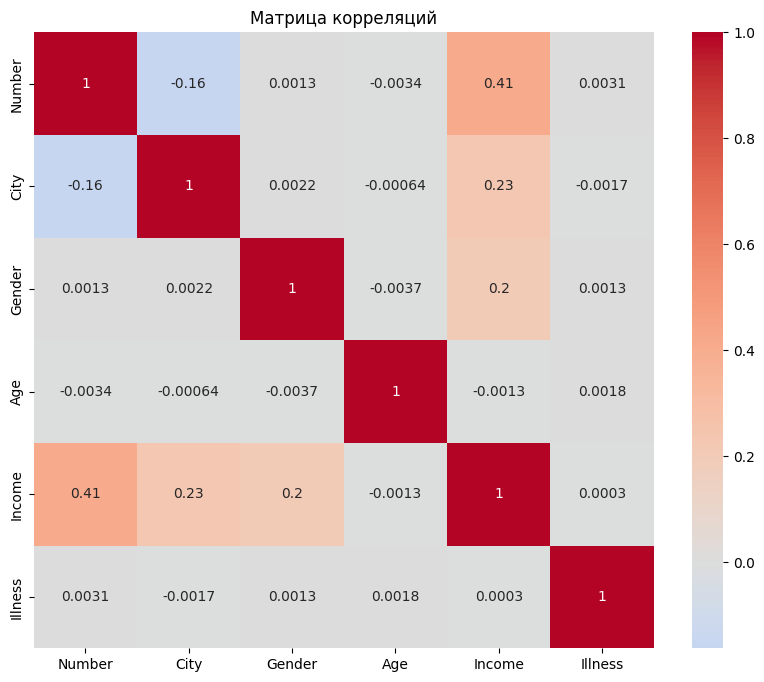

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')
plt.show()

Проанализируем полученную корреляцию

In [23]:
print("\nАнализ корреляций:")
print("1. Корреляция между Age и Income:", correlation_matrix.loc['Age', 'Income'])
print("2. Корреляция между Gender и Illness:", correlation_matrix.loc['Gender', 'Illness'])
print("3. Корреляция между Age и Illness:", correlation_matrix.loc['Age', 'Illness'])


Анализ корреляций:
1. Корреляция между Age и Income: -0.0013181143630557252
2. Корреляция между Gender и Illness: 0.0012969755377842608
3. Корреляция между Age и Illness: 0.0018113734494514676


----
1. Анализ корреляций между признаками:
    1. City и Income (0.23):
        - Слабая положительная корреляция
        - Указывает, что в некоторых городах доходы могут быть выше
        - Может быть полезным признаком для моделей прогнозирования дохода
    2. Gender и Income (0.20):
        - Слабая положительная корреляция
        - Может указывать на гендерный разрыв в доходах
        - Важный признак для моделей, связанных с доходом
    3. Остальные корреляции:
        - Все остальные значения близки к нулю (<0.01 по модулю)
        - Нет значимых линейных зависимостей между Age и другими признаками
        - Illness практически не коррелирует ни с одним из признаков
----
2. Возможности построения моделей:
    1. Для прогнозирования Income:
        - Наиболее перспективное направление
        - Полезные признаки: City, Gender
        - Можно попробовать линейную регрессию, деревья решений
        - Требуется feature engineering для City (one-hot encoding)
    2. Для классификации Illness:
        - Крайне низкие корреляции с другими признаками
        - Текущие признаки не объясняют Illness
        - Возможные решения:
            - Искать другие признаки (образ жизни, наследственность и т.д.)
            - Пробовать сложные модели (ансамбли, нейросети)
            - Убедиться в качестве данных Illness (возможно ошибки в сборе)
    3. Для кластеризации:
        - Можно попробовать кластеризацию по Income, Age, City
        - Возможно выявление групп населения с разным уровнем дохода
----
3. Проблемы и ограничения:
    1. Качество данных Illness:
        - Нулевые корреляции с другими признаками вызывают вопросы
        - Возможно, данные собраны некорректно или недостаточно признаков
    2. Отсутствие сильных корреляций:
        - Нет явных линейных зависимостей между признаками
        - Модели могут показывать низкую точность
    3. Категориальные признаки:
        - Gender можно оставить как бинарный признак
----
4. Рекомендации по улучшению:
    1. Дополнительные данные:
        - Для Illness нужны медицинские показатели, образ жизни
        - Для Income - образование, профессия, стаж
    2. Feature engineering:
        - Создать возрастные группы из Age
        - Для City можно добавить экономические показатели городов
        - Логарифмировать Income для уменьшения skewness
    3. Методы моделирования:
        - Для Income: линейные модели с регуляризацией
        - Для Illness: методы, работающие с несбалансированными данными
        - Попробовать нелинейные модели (SVM с RBF ядром, градиентный бустинг)
----
Итоговый вывод:

Текущие данные позволяют строить модели машинного обучения, но с ограничениями:
1. Наиболее перспективно моделирование Income
2. Для Illness текущие данные недостаточны - нужны дополнительные признаки
3. Категориальные признаки требуют правильного преобразования
4. Отсутствие сильных корреляций предполагает, что:
    - Либо зависимости нелинейные
    - Либо в данных недостаточно информативных признаков

Построим диаграмму рассеяния

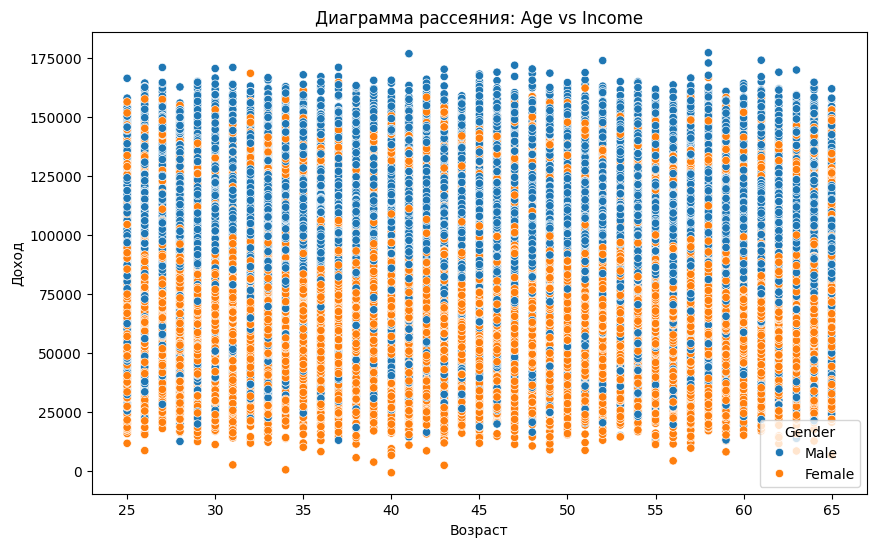

In [24]:
# Построение диаграммы рассеяния для Age и Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Income', hue='Gender')
plt.title('Диаграмма рассеяния: Age vs Income')
plt.xlabel('Возраст')
plt.ylabel('Доход')
plt.show()

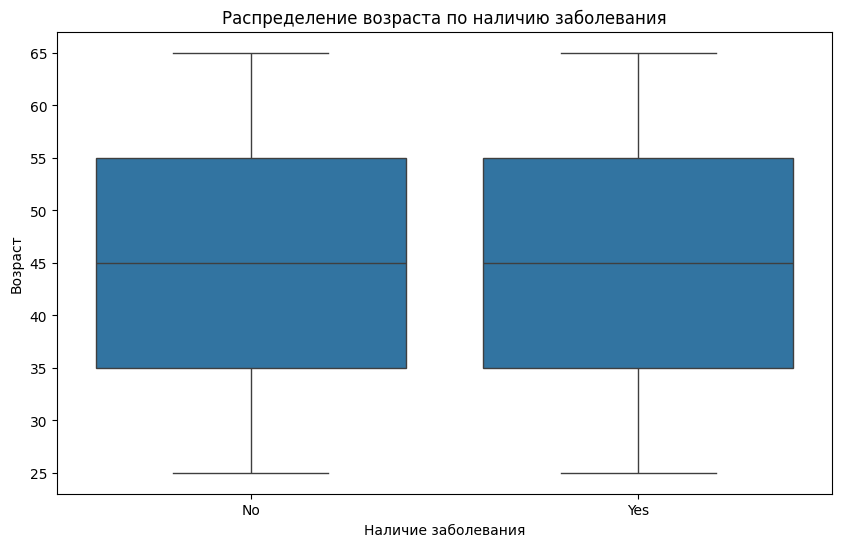

In [25]:
# Дополнительный анализ: распределение Illness по Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Illness', y='Age')
plt.title('Распределение возраста по наличию заболевания')
plt.xlabel('Наличие заболевания')
plt.ylabel('Возраст')
plt.show()